# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Start coding here...

## Data validation

In [48]:
# Importing libraries and reading the data
import pandas as pd
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [49]:
# Some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [50]:
# The 'recipe' column is clean
print(df['recipe'].duplicated().sum(),
      df['recipe'].max()-df['recipe'].min())

0 946


Unique categoris:
( 'Lunch/Snacks',  'Beverages',  'Potato',  'Vegetable',  'Meat',  'Chicken',  'Pork',  'Dessert',  'Breakfast', 
 'One Dish Meal' )

In [51]:
# Cleaning and transforming the 'category' column
print(df['category'].unique())
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')

['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [52]:
# Cleaning and transforming the 'servings' column
print(df['servings'].unique())
df['servings'] = df['servings'].str.replace(' as a snack', '')
df['servings'] = df['servings'].astype('int')

['6' '4' '1' '2' '4 as a snack' '6 as a snack']


In [53]:
# Cleaning and transforming the 'high_traffic' column, replacing nulls with 'Low'
print(df['high_traffic'].unique())
df['high_traffic'] = df['high_traffic'].fillna(value='Low')

['High' nan]


## Exploratory Analysis

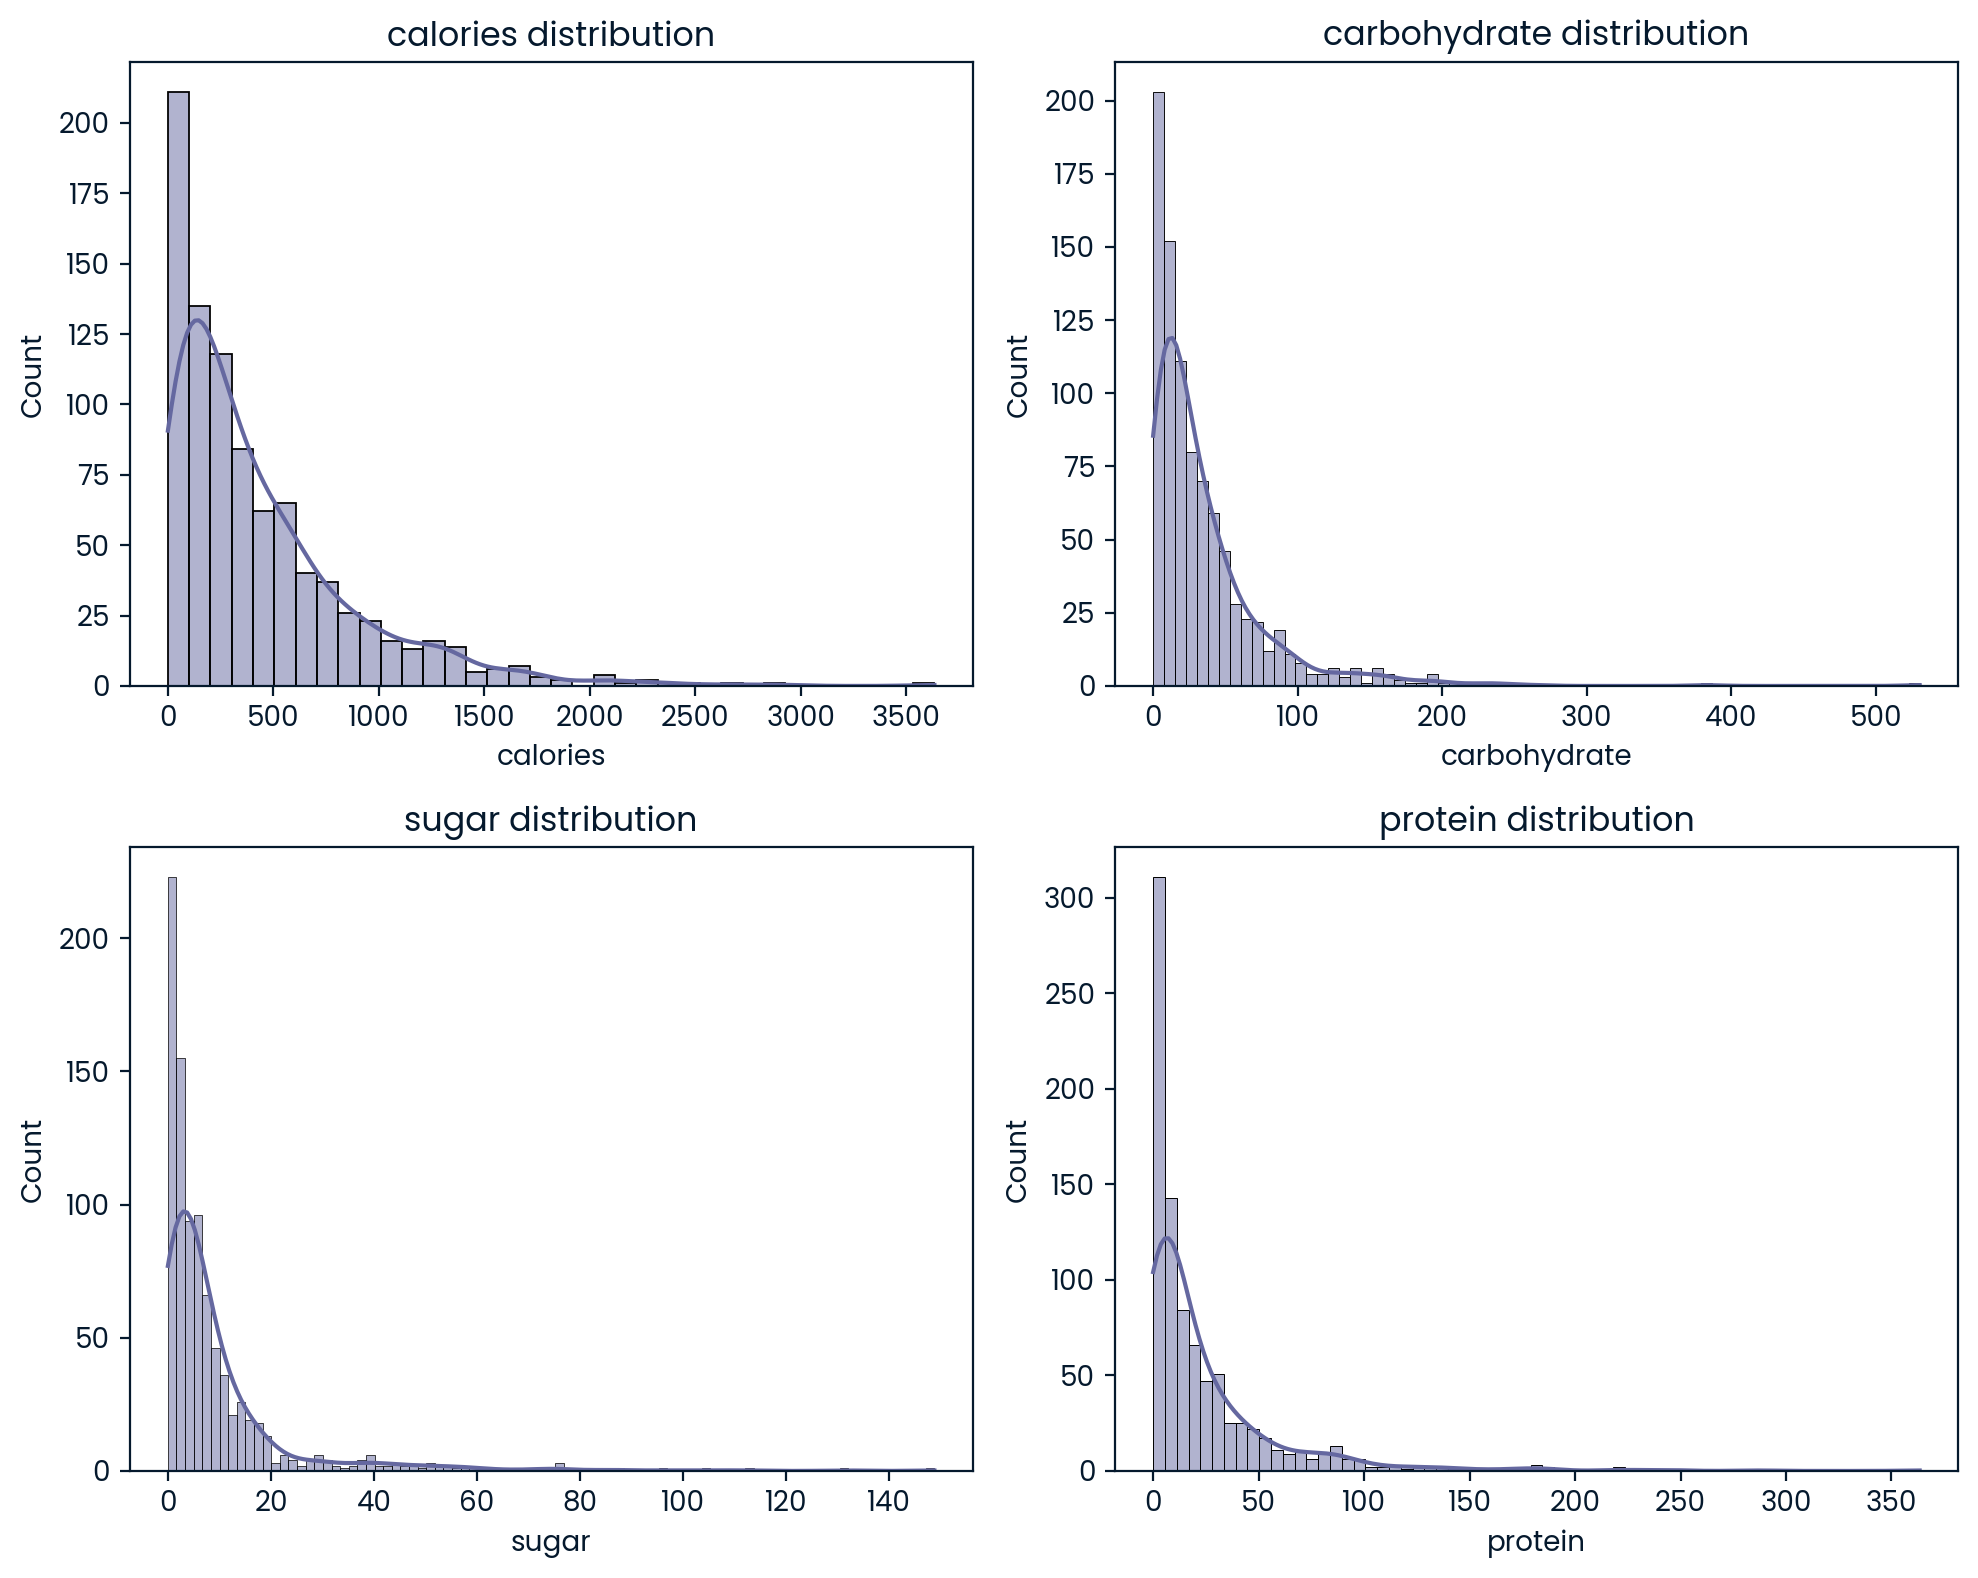

In [54]:
# Visualizing distributions of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, column, title in zip(axes.flatten(), numerical_columns, numerical_columns):
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f'{title} distribution')
plt.tight_layout()
plt.show()

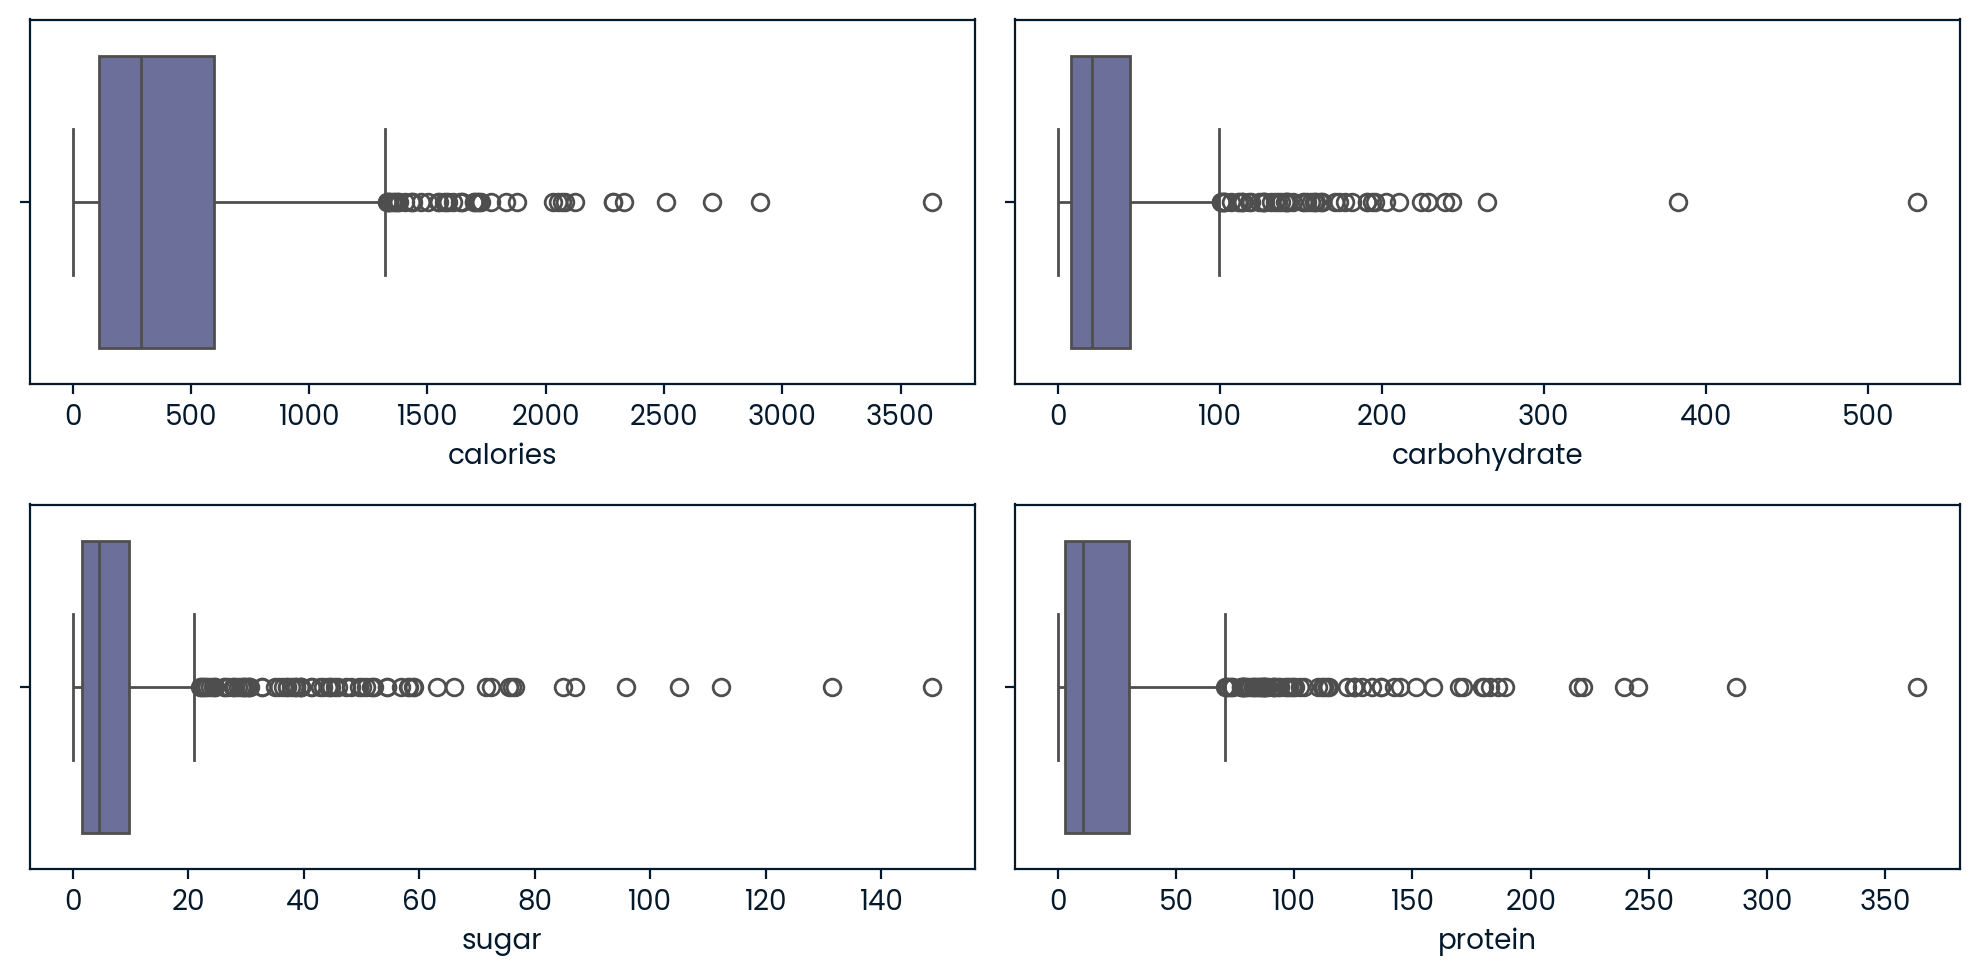

In [55]:
# Using boxplots to visualize the outliers
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(data=df, x=column, ax=ax)
plt.tight_layout()
plt.show()

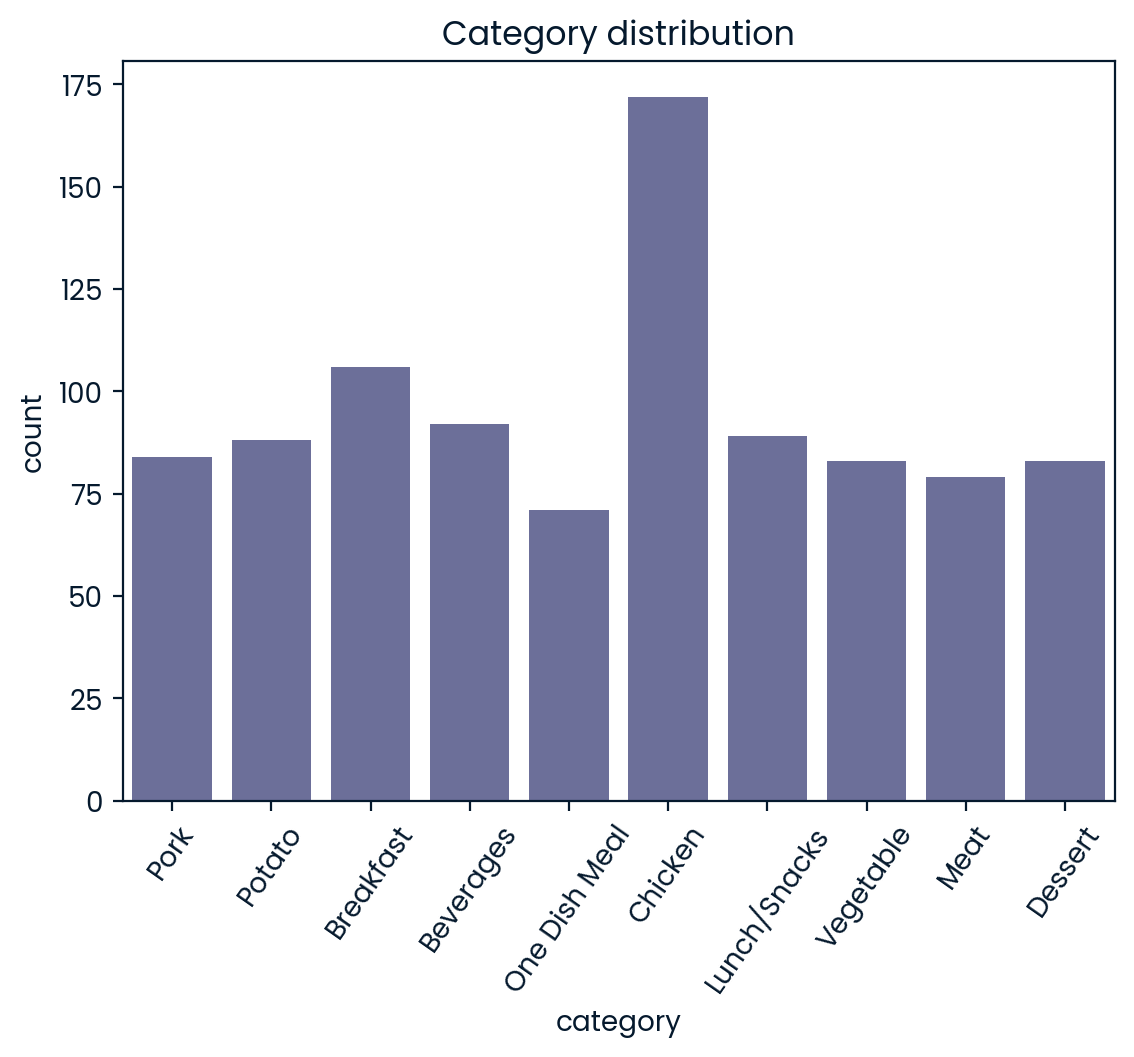

In [56]:
# Visualizong the proportions of the category column
sns.countplot(x='category', data = df)
plt.xticks(rotation=55)
plt.title('Category distribution')
plt.show()

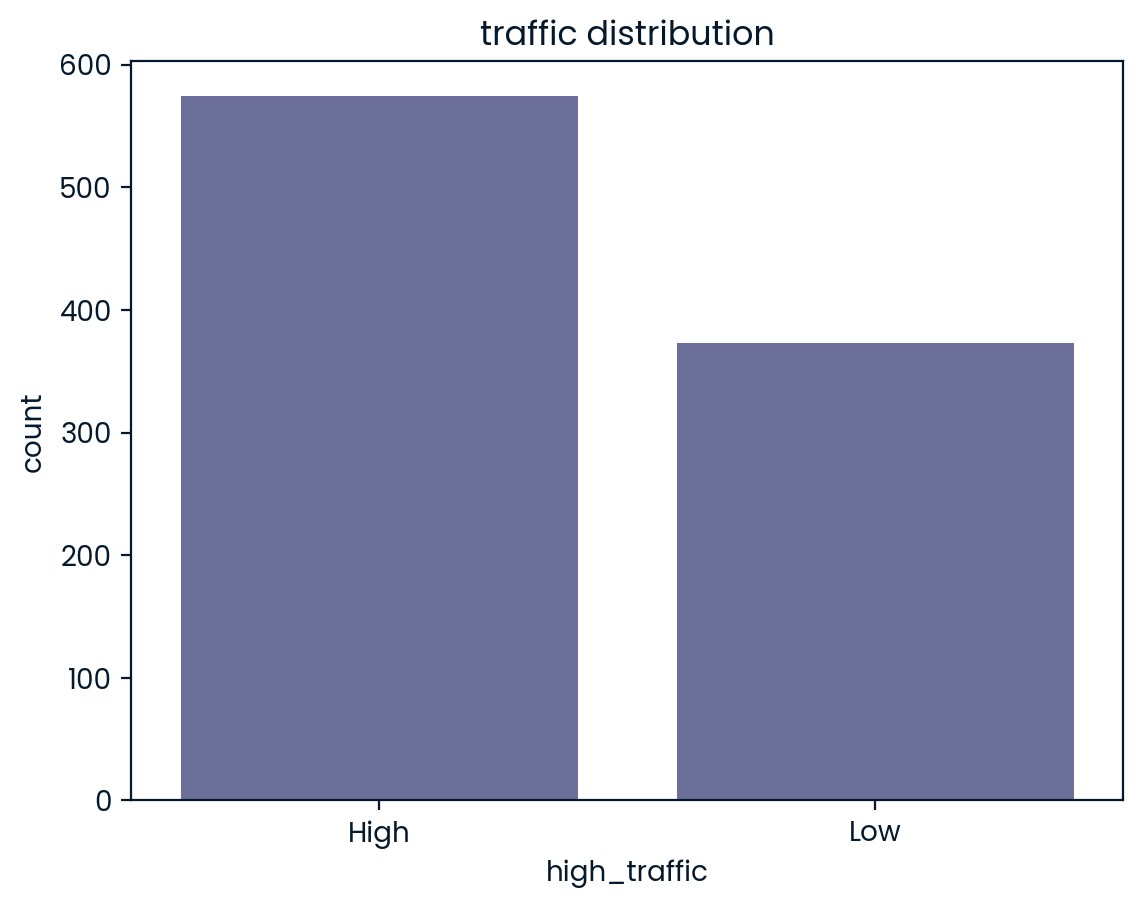

In [57]:
# Visualizong the proportions of the category column
sns.countplot(x='high_traffic', data = df)
plt.title('traffic distribution')
plt.show()

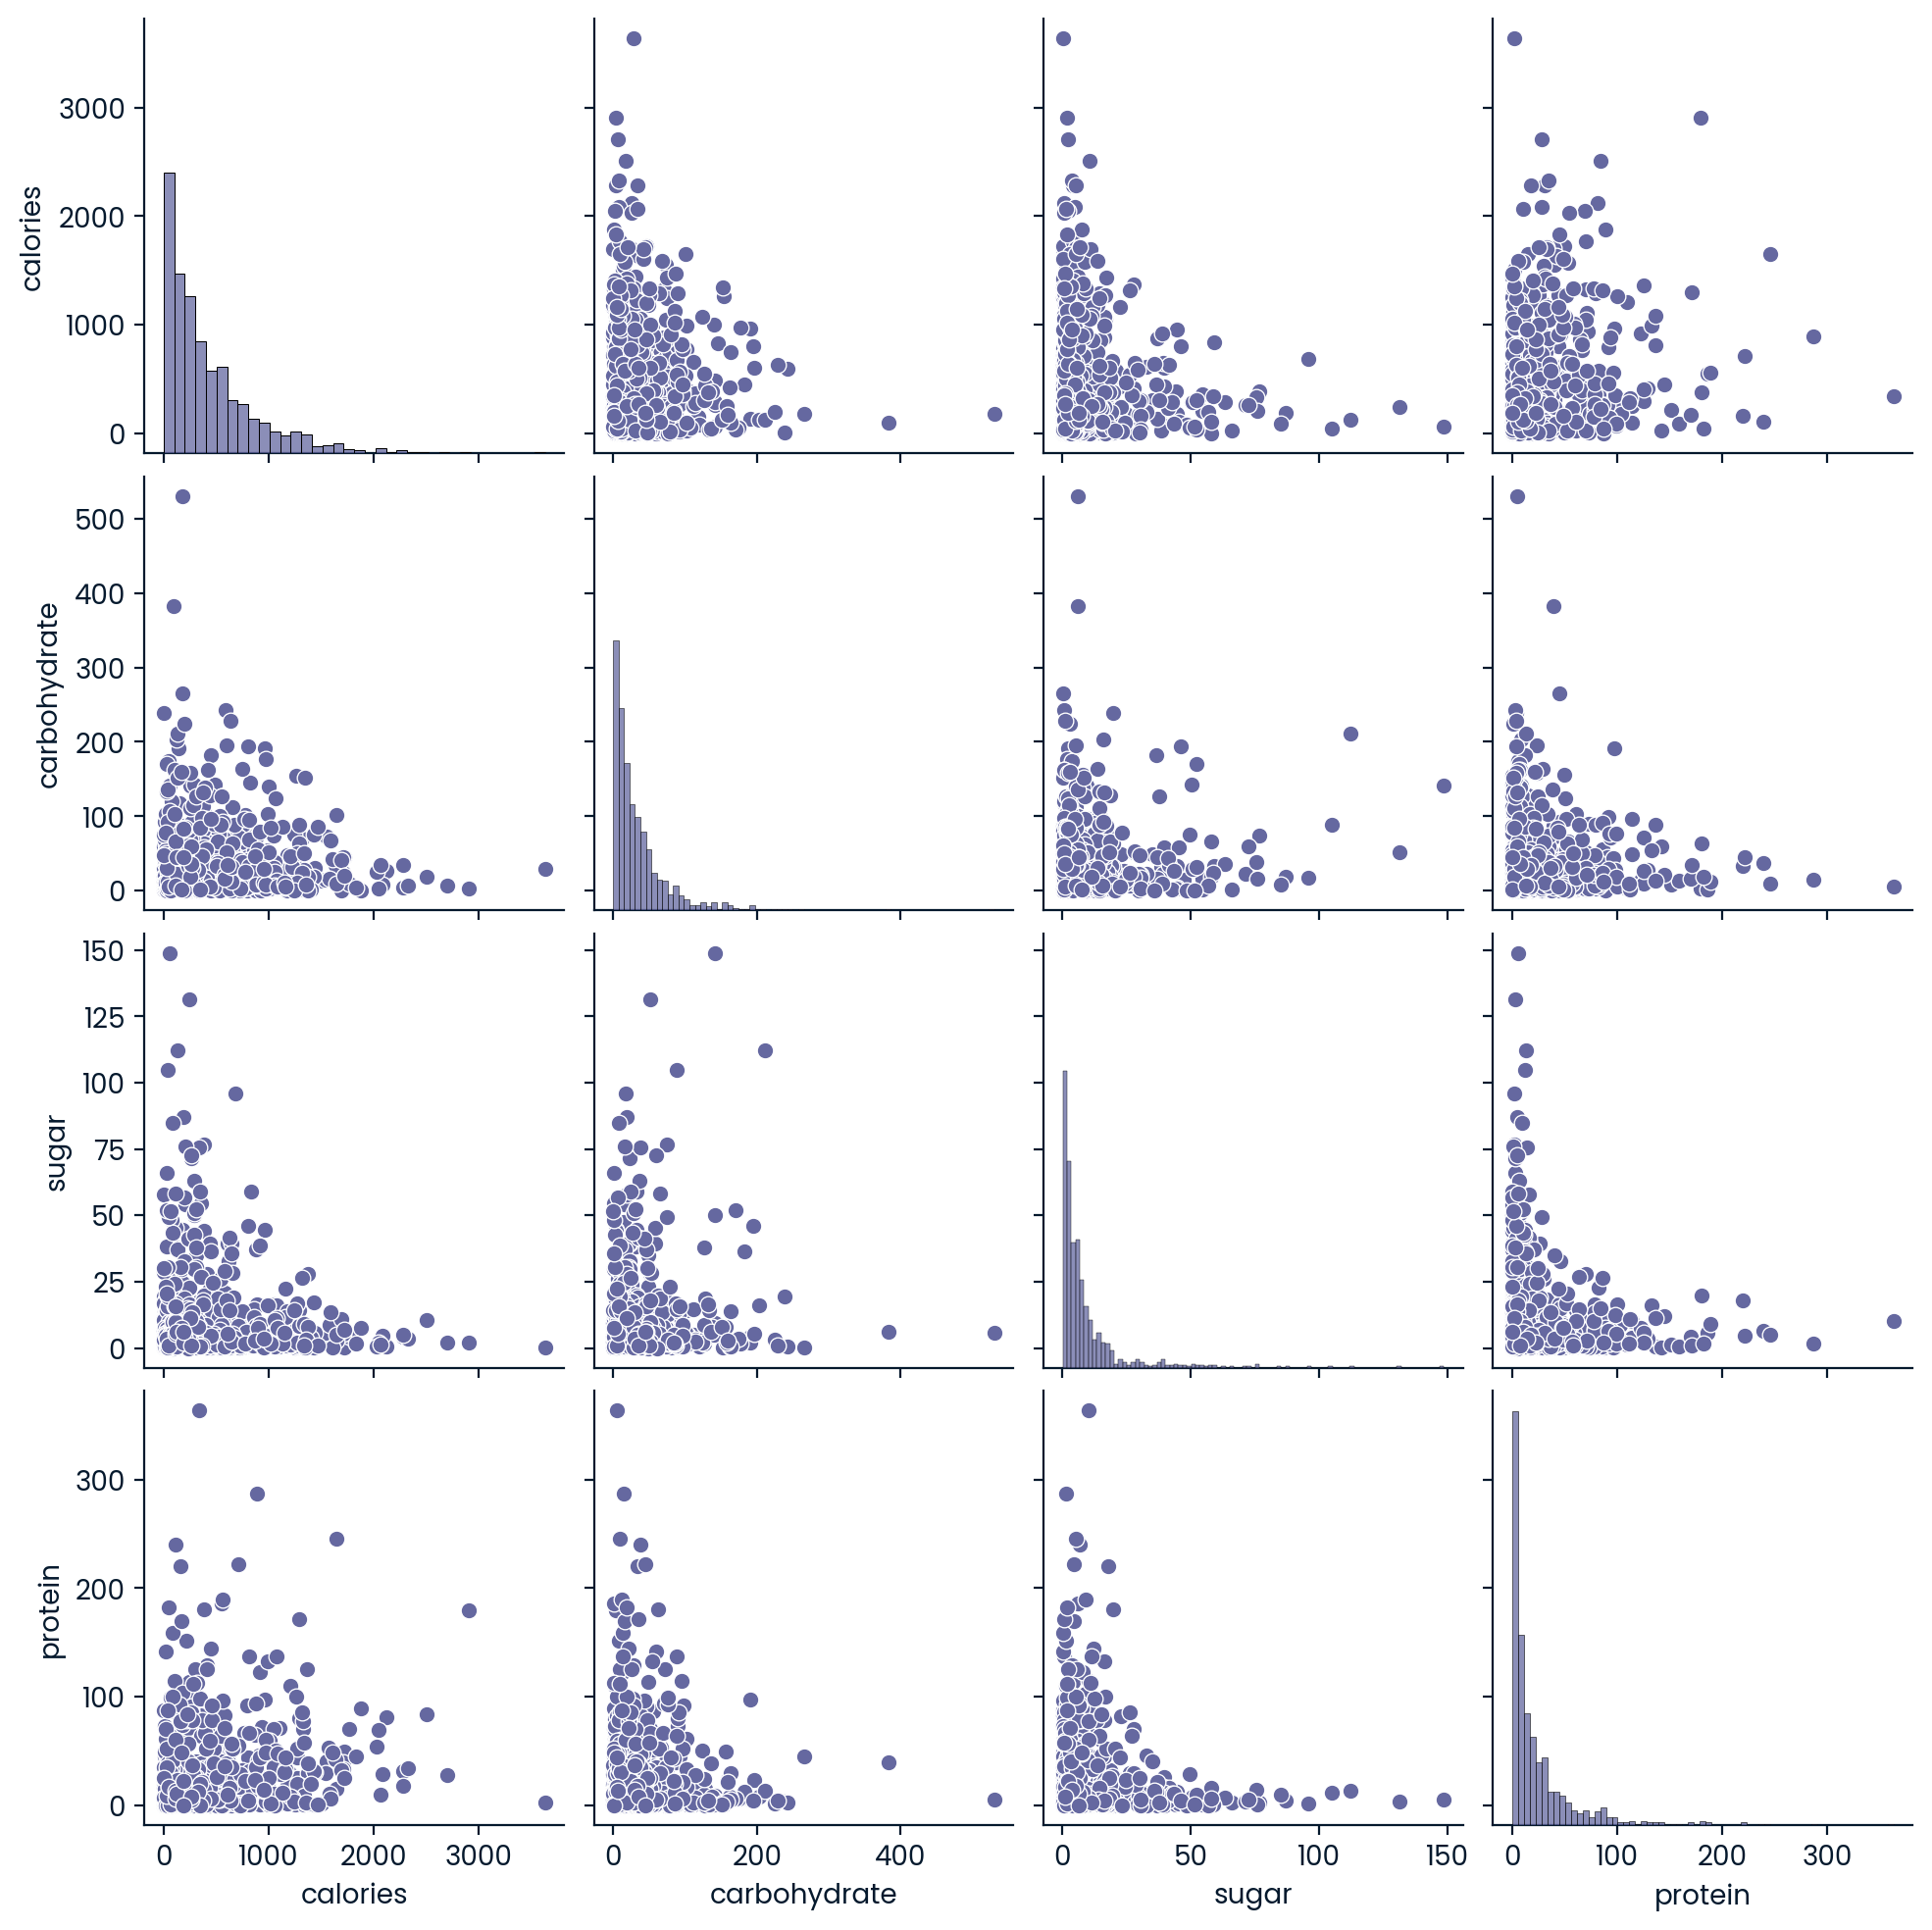

In [58]:
# Visualizong the relationships between numerical columns
sns.pairplot(data=df, vars=['calories', 'carbohydrate', 'sugar', 'protein'])

In [59]:
# Identifying and handling outliers
def remove_outliers(df, columns, threshold=2):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

clean_df = remove_outliers(df, numerical_columns)
print(len(clean_df))

715


## Model development

In [60]:
import numpy as np
# from sklearn.preprocessing import StandardScaler
for column in numerical_columns:
    # scaler = StandardScaler()
    # clean_df[column] = scaler.fit_transform(clean_df[column].values.reshape(-1, 1))
    clean_df[column] = np.sqrt(clean_df[column])

In [61]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['category', 'high_traffic']
for column in categorical_columns:
    encoder = LabelEncoder()
    clean_df[column] = encoder.fit_transform(clean_df[column].values.reshape(-1, 1))

In [62]:
# encoded_data = pd.get_dummies(clean_df, columns=['category'])
# encoded_data.head()

In [63]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [64]:
#split the data into features (X) and target variable (y)
X = clean_df.drop("high_traffic", axis=1)
y = clean_df["high_traffic"]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create function to fit the model, make prediction, and return evaluation metrics
def develop_model(model, X_train, y_train, X_test, y_test):
    evaulation_metrics = {}

    #fit the model
    model.fit(X_train, y_train)

    #predict for train and test data
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    #find evaluation parameters for train data
    model_accuracy_train = accuracy_score(y_train, model_pred_train)
    model_precision_train = precision_score(y_train, model_pred_train)
    model_recall_train = recall_score(y_train, model_pred_train)
    model_f1_train = f1_score(y_train, model_pred_train)
    model_cm_train = confusion_matrix(y_train, model_pred_train)
    
    evaulation_metrics['train'] = [model_accuracy_train, model_precision_train, model_recall_train, model_f1_train, model_cm_train]

    #find evaluation parameters for test data
    model_accuracy_test = accuracy_score(y_test, model_pred_test)
    model_precision_test = precision_score(y_test, model_pred_test)
    model_recall_test = recall_score(y_test, model_pred_test)
    model_f1_test = f1_score(y_test, model_pred_test)
    model_cm_test = confusion_matrix(y_test, model_pred_test)
    
    evaulation_metrics['test'] = [model_accuracy_test, model_precision_test, model_recall_test, model_f1_test, model_cm_test]

    return evaulation_metrics

In [65]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(572, 7) (143, 7) (572,) (143,)


In [66]:
# Training models
logistic_regression = develop_model(LogisticRegression(), X_train, y_train, X_test, y_test)

In [67]:
decision_tree = develop_model(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

In [68]:
random_forest = develop_model(RandomForestClassifier(), X_train, y_train, X_test, y_test)

In [69]:
gradient_boosting = develop_model(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)

## Model evaluation

In [70]:
def print_metrics(evaluation_metrics):
    print("  Accuracy:", evaluation_metrics[0])
    print("  Precision:", evaluation_metrics[1])
    print("  Recall:", evaluation_metrics[2])
    print("  F1-Score:", evaluation_metrics[3])
    print("  Confusion Matrix:")
    print(evaluation_metrics[4])
    

In [71]:
#print the evaluation metrics and confusion matrices for Logistic Regression
print("Logistic Regression Train:")
print_metrics(logistic_regression['train'])

print("Logistic Regression Test:")
print_metrics(logistic_regression['test'])

Logistic Regression Train:
  Accuracy: 0.7465034965034965
  Precision: 0.6782945736434108
  Recall: 0.7383966244725738
  F1-Score: 0.7070707070707071
  Confusion Matrix:
[[252  83]
 [ 62 175]]
Logistic Regression Test:
  Accuracy: 0.7622377622377622
  Precision: 0.6617647058823529
  Recall: 0.8035714285714286
  F1-Score: 0.7258064516129031
  Confusion Matrix:
[[64 23]
 [11 45]]


In [72]:
#print the evaluation metrics and confusion matrices for Logistic Regression
print("decision_tree Train:")
print_metrics(decision_tree['train'])

print("decision_tree Test:")
print_metrics(decision_tree['test'])

decision_tree Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[335   0]
 [  0 237]]
decision_tree Test:
  Accuracy: 0.6503496503496503
  Precision: 0.5454545454545454
  Recall: 0.6428571428571429
  F1-Score: 0.5901639344262296
  Confusion Matrix:
[[57 30]
 [20 36]]


In [73]:
#print the evaluation metrics and confusion matrices for Logistic Regression
print("random_forest Train:")
print_metrics(random_forest['train'])

print("random_forest Test:")
print_metrics(random_forest['test'])

random_forest Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[335   0]
 [  0 237]]
random_forest Test:
  Accuracy: 0.7552447552447552
  Precision: 0.6909090909090909
  Recall: 0.6785714285714286
  F1-Score: 0.6846846846846847
  Confusion Matrix:
[[70 17]
 [18 38]]


In [74]:
#print the evaluation metrics and confusion matrices for Logistic Regression
print("gradient_boosting Train:")
print_metrics(gradient_boosting['train'])

print("gradient_boosting Test:")
print_metrics(gradient_boosting['test'])

gradient_boosting Train:
  Accuracy: 0.9405594405594405
  Precision: 0.9551569506726457
  Recall: 0.8987341772151899
  F1-Score: 0.9260869565217392
  Confusion Matrix:
[[325  10]
 [ 24 213]]
gradient_boosting Test:
  Accuracy: 0.7202797202797203
  Precision: 0.6481481481481481
  Recall: 0.625
  F1-Score: 0.6363636363636364
  Confusion Matrix:
[[68 19]
 [21 35]]


## Business metric
Using our logistic regression model will result in good conversion rate because it doesn't suffer from overfitting unlike other models that require some extra work on cross validation, this model satisfies the business requirments of 80% positive class accuracy and will be good in a production environment

# Final summary of the project

In this project report, we finished the data validation, visualization and processing. To fit the model to predict whether a dish would be popular, we came up with a baseline model logistic regression and a comparison model neural network. Then, we evaluated them with different metrics.

In this project, we found some possible problems of the dataset, which is also something we should do in the future in business:

1. We should discuss with Tasty Bytes about more of their model performance. In this task description, we only know their model performance about low scoring recipes, which is incomplete to evaluate the model. That is because a model can be very good at predicting one class while poor at the other.
2. We should ask Tasty Bytes for more information about each recipes to make better predictions. Currently, we use all the information we have, but the accuracy was not high. It is possible that the given information is not quite relevant to popularity. It might be some other factors, for example, whether the dish is tasty, or who made the dishes, that can influence the popularity the most. Hence, we believe more information about the recipe would definately help us with predicting.
3. (For intern use and not present to Tasty Bytes) It would be beneficial if we have better computation resource. I tried to analyze the name of recipes with NLP techniques but the DataCamp Workspace cannot take a relatively big model. Of course, it might still fail even if we add the name information, but it definately worths a try.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation